In [347]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Activation,MaxPooling2D,Dropout
import seaborn as sns
tf.optimizers.Adam

keras.optimizer_v2.adam.Adam

In [348]:
train_dir = Path(r'D:\CDAC SOFTWARE\abhinandan\CDAC\Project\LeafProject\Leaf Project Contents\FINALDATASET')

In [349]:
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [350]:
train_filepaths[1:5]

[WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-002.jpg'),
 WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-003.jpg'),
 WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-004.jpg'),
 WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-005.jpg')]

In [351]:
filepath = pd.Series(train_filepaths,name='Filepath').astype(str)

In [352]:
labels = []
for i in range(len(filepath)):
    
    # list.append(i)

    label=str(train_filepaths[i]).split('\\')[-2].split(".",1)[0]
    labels.append(label)
    
    
    # labels = pd.Series(labels, name='Labels')

In [353]:
labels[1:5]

['Aam', 'Aam', 'Aam', 'Aam']

In [354]:
train_filepaths[1:5]

[WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-002.jpg'),
 WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-003.jpg'),
 WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-004.jpg'),
 WindowsPath('D:/CDAC SOFTWARE/abhinandan/CDAC/Project/LeafProject/Leaf Project Contents/FINALDATASET/Aam/MI-S-005.jpg')]

In [355]:
filepath = pd.Series(train_filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
df = pd.concat([filepath, labels], axis=1)
df = df.sample(frac=1).reset_index(drop = True)

In [356]:
train_df=df
train_df.head()

,Filepath,Label
0,D:\CDAC SOFTWARE\abhinandan\CDAC\Project\LeafP...,Aam
1,D:\CDAC SOFTWARE\abhinandan\CDAC\Project\LeafP...,Giloy
2,D:\CDAC SOFTWARE\abhinandan\CDAC\Project\LeafP...,Giloy
3,D:\CDAC SOFTWARE\abhinandan\CDAC\Project\LeafP...,Anaar
4,D:\CDAC SOFTWARE\abhinandan\CDAC\Project\LeafP...,Peepal


In [357]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique().tolist()}')

-- Training set --

Number of pictures: 2146

Number of different labels: 32

Labels: ['Aam', 'Giloy', 'Anaar', 'Peepal', 'Arhul', 'Sarso', 'Amrud', 'Jackfruit', 'Tindora', 'Jamaica Cherry', 'Harive-Dantu', 'Ghrit Kumari', 'Karanda', 'Pudina', 'Curry', 'Mogra', 'Tulsi', 'Chandan', 'Neem', 'Parijata', 'Rasna', 'Nimbu', 'Rose Apple', 'Chandni', 'Phagoora', 'Drumstick', 'Malabar spinach', 'Karanja', 'Mithi', 'Jamun', 'Paan', 'Oleander']


# Preprocessing Data

In [358]:
train_DataGenerator = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)

test_DataGenerator = ImageDataGenerator(
    rescale=1/255,
)

In [359]:
train_df, test_df = train_test_split(train_df, 
                                     test_size=0.2, 
                                     shuffle=True, 
                                     random_state=1)

In [360]:
train_images = train_DataGenerator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    directory = train_dir,
    target_size=(128, 128),
    class_mode="categorical",
    seed=42,
    subset='training'
)

Found 1373 validated image filenames belonging to 32 classes.


In [361]:
val_images = train_DataGenerator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    directory = train_dir,
    target_size=(128, 128),
    class_mode="categorical",
    seed=42,
    subset='validation'
)


Found 343 validated image filenames belonging to 32 classes.


In [362]:
test_images = test_DataGenerator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    directory = train_dir,
    target_size=(128, 128),
    class_mode="categorical"
)

Found 430 validated image filenames belonging to 32 classes.


In [363]:
test_images.image_shape, train_images.image_shape

((128, 128, 3), (128, 128, 3))

# Using Normal CNN Model 

In [364]:
# Create a Sqequntial model object
model = Sequential()

# Add first Conv and pool layers
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 activation = "relu", 
                 input_shape = (128, 128, 3),
                 name= "Input_Layer"))
model.add(MaxPool2D((2,2), name = "Pooling_1"))

# 2nd Conv and pool layers
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 activation = "relu", 
                 name= "Conv_Layer"))
model.add(MaxPool2D((2,2), name = "Pooling_2"))
# 3rd Conv and pool layers
model.add(Conv2D(filters = 64, 
                kernel_size = (3,3), 
                activation = "relu", 
                name= "Conv_Layer3"))
model.add(MaxPool2D((2,2), name = "Pooling_3"))
#4th Conv and pool layers
model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3), 
                 activation = "relu", 
                 name= "Conv_Layer4"))
model.add(MaxPool2D((2,2), name = "Pooling_4"))

# Flatten the output of 2nd conv layer
model.add(Flatten())

# Add FC layers
model.add(Dense(128, activation="relu", name="Dense_1")) # FC1
model.add(Dense(64, activation="relu", name="Dense_2")) # FC2
model.add(Dense(32, activation="softmax", name="Output_Layer")) # FC3 - Output FC layer

In [365]:
import visualkeras
from PIL import ImageFont

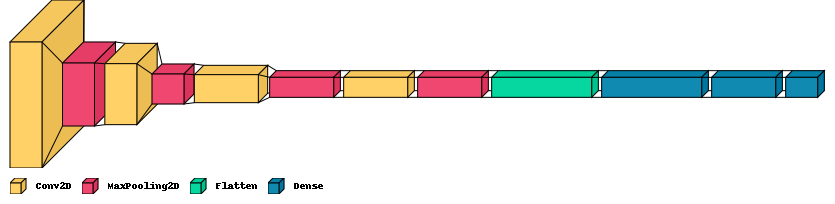

In [378]:
visualkeras.layered_view(model, scale_xy=1,scale_z=1,legend=True,max_z=100)

 # Using deep neural network

In [369]:
# model = Sequential()
    
# model.add(Conv2D(input_shape= (128,128,3),filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
# model.add(Activation('relu'))
# model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
# model.add(Activation('relu'))
# model.add(Dropout(rate = 0.25, seed = 500))
# model.add(MaxPooling2D(pool_size = (2,2)))
    
# # prior layer should be flattend to be connected to dense layers
# model.add(Flatten())
#     # dense layer with 50 neurons
# model.add(Dense(50, activation = 'relu'))
#     # final layer with 10 neurons to classify the instances
# model.add(Dense(10, activation = 'softmax'))

In [370]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Conv2D)        (None, 126, 126, 32)      896       
                                                                 
 Pooling_1 (MaxPooling2D)    (None, 63, 63, 32)        0         
                                                                 
 Conv_Layer (Conv2D)         (None, 61, 61, 32)        9248      
                                                                 
 Pooling_2 (MaxPooling2D)    (None, 30, 30, 32)        0         
                                                                 
 Conv_Layer3 (Conv2D)        (None, 28, 28, 64)        18496     
                                                                 
 Pooling_3 (MaxPooling2D)    (None, 14, 14, 64)        0         
                                                                 
 Conv_Layer4 (Conv2D)        (None, 12, 12, 64)      

# Using Optimizers

## First Approch 

In [371]:
# adam = tf.keras.optimizers.Adam( learning_rate=0.001)

In [372]:
model.compile(
    optimizer="adam", # with RMS accuracy is less around 20 percent with 2 epoc
    loss="categorical_crossentropy", # Since there are only two classes
    metrics="accuracy"
)

# Building a model 

## Normal CNN model 

In [373]:
# Build/Train the model using CNN
leaf_model = model.fit(
    train_images,
    epochs = 30,
    validation_data=val_images
)

Epoch 1/30
43/43 [==============================] - 65s 1s/step - loss: 3.3968 - accuracy: 0.1129 - val_loss: 3.2411 - val_accuracy: 0.1808
Epoch 2/30
43/43 [==============================] - 38s 882ms/step - loss: 2.5639 - accuracy: 0.3146 - val_loss: 1.9481 - val_accuracy: 0.4227
Epoch 3/30
43/43 [==============================] - 37s 870ms/step - loss: 1.5887 - accuracy: 0.5149 - val_loss: 1.4147 - val_accuracy: 0.5860
Epoch 4/30
43/43 [==============================] - 41s 951ms/step - loss: 1.1365 - accuracy: 0.6438 - val_loss: 1.0936 - val_accuracy: 0.6647
Epoch 5/30
43/43 [==============================] - 61s 1s/step - loss: 0.8809 - accuracy: 0.7385 - val_loss: 1.0484 - val_accuracy: 0.7026
Epoch 6/30
43/43 [==============================] - 52s 1s/step - loss: 0.7322 - accuracy: 0.7742 - val_loss: 0.9772 - val_accuracy: 0.7230
Epoch 7/30
43/43 [==============================] - 49s 1s/step - loss: 0.5840 - accuracy: 0.8150 - val_loss: 1.0356 - val_accuracy: 0.6968
Epoch 8/30


 * 30 epoches are required to get the maximum accuracy *

## Deep CNN model 

In [42]:
# leaf_model = model.fit(
#     train_images,
#     epochs = 10,
#     validation_data=val_images
# )

Epoch 1/10
17/17 [==============================] - 67s 4s/step - loss: 2.4688 - accuracy: 0.1300 - val_loss: 2.2443 - val_accuracy: 0.1538
Epoch 2/10
17/17 [==============================] - 60s 3s/step - loss: 2.0724 - accuracy: 0.2715 - val_loss: 1.9643 - val_accuracy: 0.2769
Epoch 3/10
17/17 [==============================] - 58s 3s/step - loss: 1.6933 - accuracy: 0.4015 - val_loss: 1.6260 - val_accuracy: 0.4308
Epoch 4/10
17/17 [==============================] - 56s 3s/step - loss: 1.3507 - accuracy: 0.5105 - val_loss: 1.3956 - val_accuracy: 0.5231
Epoch 5/10
17/17 [==============================] - 63s 4s/step - loss: 1.0463 - accuracy: 0.6348 - val_loss: 1.2344 - val_accuracy: 0.5231
Epoch 6/10
17/17 [==============================] - 59s 3s/step - loss: 0.8907 - accuracy: 0.7132 - val_loss: 1.3352 - val_accuracy: 0.5462
Epoch 7/10
17/17 [==============================] - 57s 3s/step - loss: 0.7974 - accuracy: 0.7075 - val_loss: 1.2281 - val_accuracy: 0.5846
Epoch 8/10
17/17 [==

* With deep CNN the accuracy is less than normal CNN *

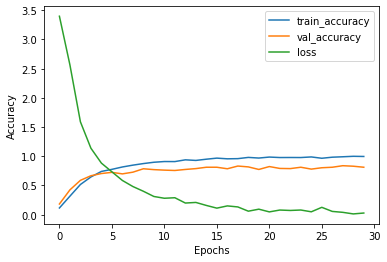

In [390]:
plt.plot(leaf_model.history['accuracy'], label="train_accuracy")
plt.plot(leaf_model.history['val_accuracy'], label="val_accuracy")
plt.plot(leaf_model.history['loss'], label="loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## model for normal CNN

In [380]:
model.save("./models/leaf_model4.h5", save_format='h5')

In [381]:
model.evaluate(test_images)

14/14 [==============================] - 17s 1s/step - loss: 0.8068 - accuracy: 0.8233


[0.8067746758460999, 0.8232558369636536]

* With normal CNN the accuracy is 70 percent with 10 epoches*
* With normal CNN the with more the train accuracy is 87 percent accuracy but test accuracy is 83.95 percent with 20 epoches*
* With normal CNN and less layers the train accuracy is 100 percent but test accuracy is 81.1 with 20 epoches*
* With normal CNN and with more the train accuracy is 100 percent but test accuracy is 88.37 with 30 epoches*

## model for Deep CNN

In [44]:
# model.save("./models/leaf_model5.h6", save_format='h5')

In [45]:
# model.evaluate(test_images)

6/6 [==============================] - 5s 697ms/step - loss: 1.0661 - accuracy: 0.6402


[1.0660792589187622, 0.6402438879013062]

* With normal CNN the accuracy is 64 percent *

In [382]:
prediction_pobabilities = model.predict(test_images)

In [383]:
test_predictions = [np.argmax(prob) for prob in prediction_pobabilities]
test_predictions[1:5]

[1, 9, 7, 0]

In [384]:
cm = confusion_matrix(test_images.labels, test_predictions)
cm

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [385]:
print(classification_report(test_images.labels, test_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.08      0.05      0.06        19
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        13
           5       0.06      0.06      0.06        17
           6       0.08      0.14      0.11         7
           7       0.09      0.11      0.10        19
           8       0.16      0.14      0.15        21
           9       0.07      0.07      0.07        30
          10       0.11      0.12      0.11        26
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        10
          13       0.10      0.14      0.12         7
          14       0.16      0.14      0.15        21
          15       0.00      0.00      0.00         5
          16       0.04      0.04      0.04        24
          17       0.00    

NameError: name 'tf' is not defined